# Students Performance 

### What is EDA?

EDA refers to a set of procedures for producing descriptive and graphical summaries of data. A benefir of EDA is that it allows you to examine the data as it is without making any assumptions.

It is a useful way to examine your data, analyse relationships among variables and identify any problems such as data entry errors.

### Importing libraries

In [5]:
import numpy as np #linear algebra
import pandas as pd # Data processing, csv file I/O
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
data = pd.read_csv('Students Performance.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Get a concise summary of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

I'll start with visualizing just the categorical feaatures individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what I can deduce from that,

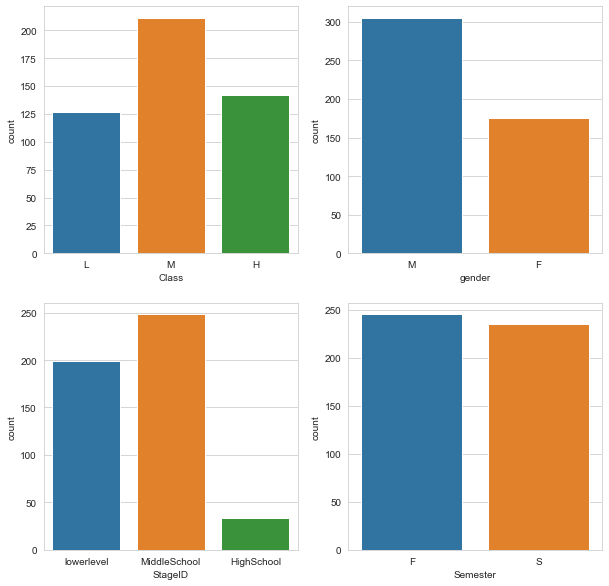

In [7]:
fig , axarr = plt.subplots(2,2, figsize =(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order = ['L', 'M', 'H'])
sns.countplot(x = 'gender', data = data, ax = axarr[0,1], order = ['M', 'F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

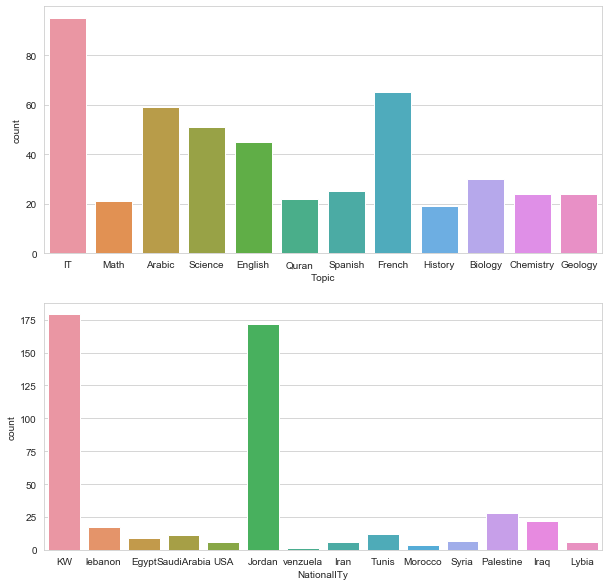

In [8]:
fig , (axis1, axis2) = plt.subplots(2,1,figsize = (10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

Most of these countries are in the middle east(Islamic states), perhaps this explains the gender disparity

#### Next I will look at some categorical features in relation to each other, to see what insights that could possibly read

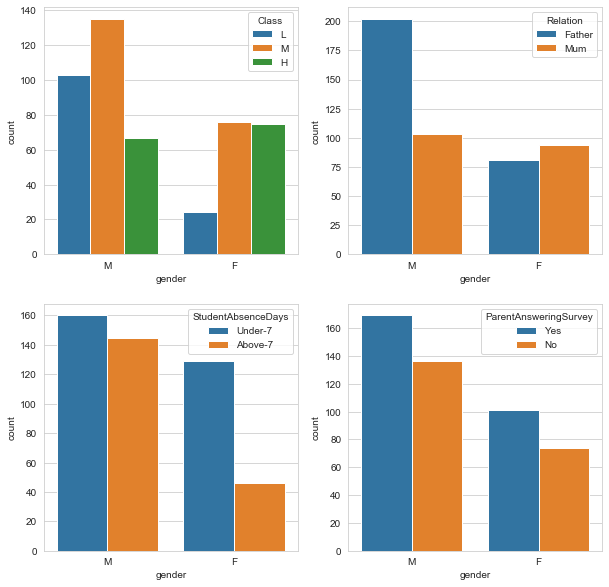

In [10]:
fig, axarr = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M', 'F'], hue_order=['L', 'M', 'H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M', 'F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M', 'F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M', 'F'])

* girls seem to have performed better than boys
* In the case of girls, mothers seem to be more interested in their education than fathers
* Girls had much better attendance than boys

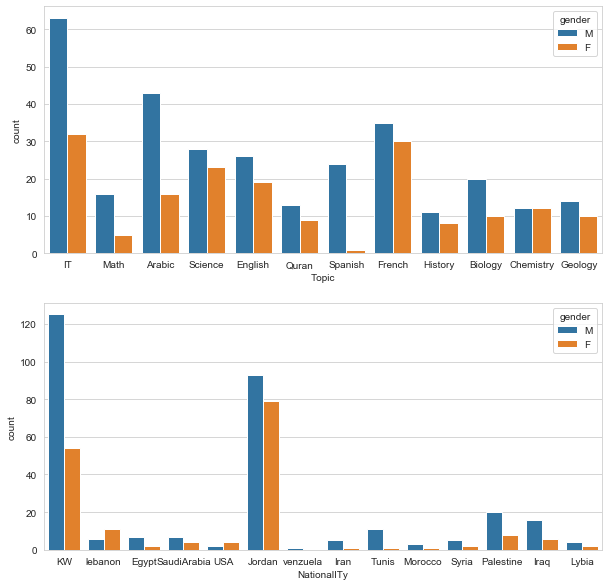

In [12]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2)

* No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects.
* Gender disparity holds even at a country level. May just be a result of sampling

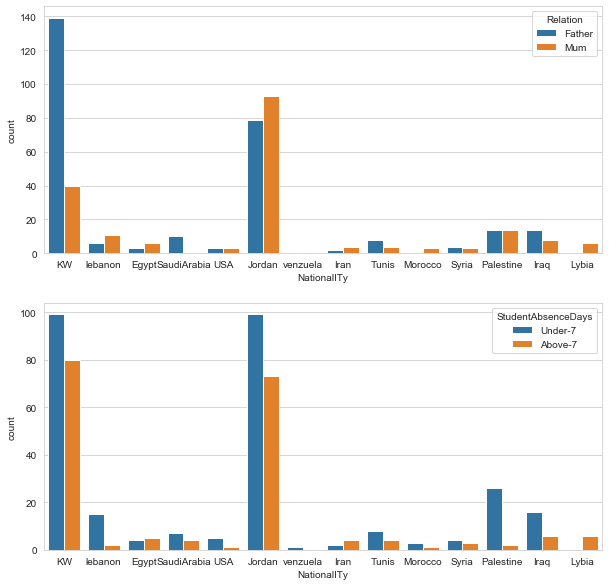

In [13]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(10,10))
sns.countplot(x='NationalITy', hue='Relation', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=data, ax=axis2)

### Now I am moving on to visualizing categorical features with numerical features.

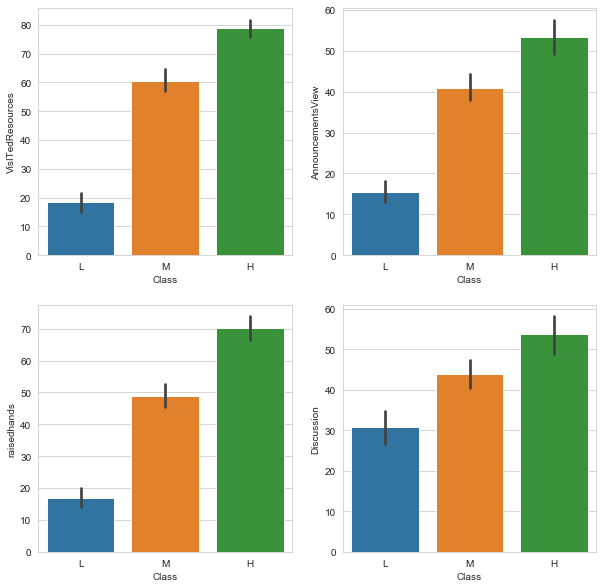

In [14]:
fig, axarr = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y ='VisITedResources', data=data, order=['L', 'M', 'H'], ax=axarr[0,0])
sns.barplot(x='Class', y = 'AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L', 'M', 'H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L', 'M', 'H'], ax=axarr[1,1])

* As expected, those that participated more(higher counts in Discussion, raisedhands, AnnouncementViews, VisITedResources), performed better ... that thing about correlation and causation.

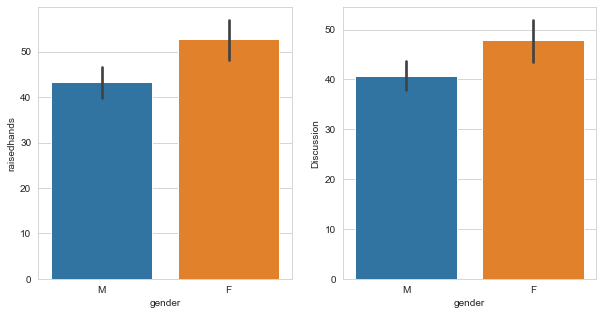

In [15]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='gender', y='raisedhands', data=data, ax=axis1)
sns.barplot(x='gender', y='Discussion', data=data, ax=axis2)

#### There are various other plots that help visualize Categorical vs Numerical data better.

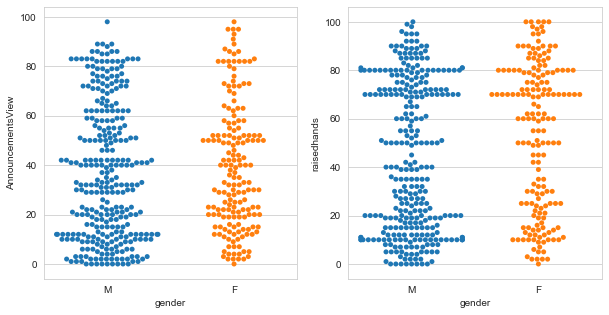

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2, figsize=(10,5))
sns.swarmplot(x='gender', y='AnnouncementsView', data=data, ax=axis1)
sns.swarmplot(x='gender', y ='raisedhands', data=data, ax=axis2)

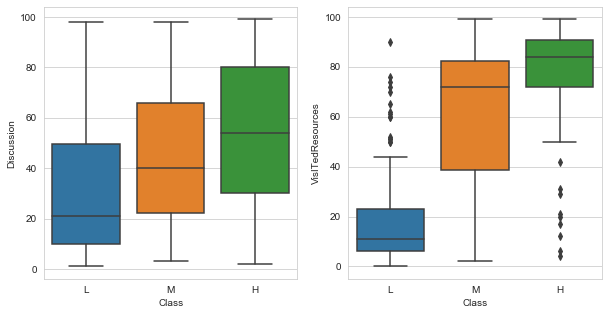

In [18]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x='Class', y='Discussion' , data = data, order = ['L', 'M', 'H'], ax=axis1)
sns.boxplot(x='Class', y ='VisITedResources', data=data, order=['L', 'M', 'H'], ax=axis2)

#### The boxplot the three quartile values of the distrubution along with extreme values. The 'whiskers' extend to points that lie within 1.5 IORs of the lower and upper quartile, and then observations that fall outside this range are displayed independently

* The two plots above tell us that visiting the resources may not be as sure a path to performing well as discusiions

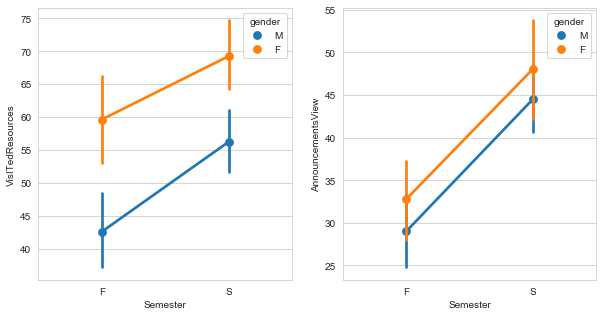

In [19]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.pointplot(x='Semester', y ='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester' , y='AnnouncementsView', hue='gender', data=data, ax=axis2)

#### Pointsplot makes it very easy to see how relationships change from variable to variable as well as the confidence interval. The confidence interval is range of values so defined that there is a specified probability that the value of a parameter lies within it.

* In the case of both visiting resources and viewing announcements, students were more vigilant in the second semester, perhaps that last minute need to boost the final grade.

#### Moving on to plots to visualize relationships between numerical features

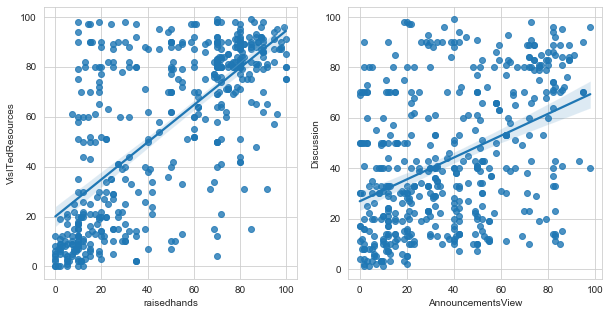

In [22]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,5))
sns.regplot(x='raisedhands', y='VisITedResources', data=data, ax=axis1)
sns.regplot(x='AnnouncementsView', y='Discussion', data=data, ax=axis2)

* There does not appear to be much of a linear relationship between the numerical features